In [ ]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer

scopus = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/scopus-papers.csv")
scopus['Author Keywords'].head()

0    Geo-location data; Human mobility; Resilience;...
1    Language analysis; LIWC; Moral foundations the...
2    Gravity model; Media ecosystem; News spreading...
3    Centrality measures; Community Structure; Infl...
4    Cholesterol; Diabetes; Digital purchase record...
Name: Author Keywords, dtype: object

In [ ]:
df = scopus.loc[:,['Author Keywords']]
df['Author Keywords'].fillna(0, inplace = True)
df.drop(df[df['Author Keywords'] == 0].index, inplace = True)
df = df.replace(' ', '_', regex=True)
df = df.replace(';_', '; ', regex=True)
df.head()

,Author Keywords
0,Geo-location_data; Human_mobility; Resilience;...
1,Language_analysis; LIWC; Moral_foundations_the...
2,Gravity_model; Media_ecosystem; News_spreading...
3,Centrality_measures; Community_Structure; Infl...
4,Cholesterol; Diabetes; Digital_purchase_record...


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

In [ ]:
vectorizer = CountVectorizer(preprocessor=preprocess_text, stop_words="english", max_features=100)
X = vectorizer.fit_transform(df['Author Keywords'])
p = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
l = vectorizer.get_feature_names_out().tolist()
l = [x.replace('_',' ') for x in l]

p = pd.DataFrame(X.toarray(), columns=l)
p

,accessibility,agent,analysis,analytics,association rule mining,association rules,big data,big data analytics,built environment,business intelligence,china,classification,cloud,cloud computing,cluster analysis,clustering,community detection,complex networks,complex systems,computational social science,crowdsourcing,data,data analysis,data analytics,data integration,data management,data mining,data quality,data science,data sharing,data warehouse,database,deep learning,feature selection,fuzzy logic,genetic algorithm,geo,geomagnetism,gis,hadoop,...,network,neural networks,non,olap,ontology,open data,persistent identifiers,prediction,predictive analytics,privacy,real,remote sensing,sampling,security,segmentation,segregation,self,semantic web,sentiment analysis,simulation,social media,social networks,socio,space syntax,space weather,spatial analysis,spatio,support vector machine,sustainability,svm,text mining,time,time series,twitter,urban design,urban planning,visualization,web mining,world data system,xml
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Punto 1: Palabras mas frecuentes

In [ ]:
contador = p.sum()
contador = contador.sort_values(ascending=False)
contador

big data             167
data mining          135
machine learning      57
multi                 44
clustering            42
                    ... 
world data system      7
means clustering       7
network                7
cloud                  7
xml                    7
Length: 100, dtype: int64

# Punto 2: matriz documento-termino

In [ ]:
p['suma'] = p.sum(axis=1)
p = p[p['suma'] != 0]
p.drop(['suma'], axis=1, inplace=True)
print(p)

      accessibility  agent  analysis  ...  web mining  world data system  xml
0                 0      0         0  ...           0                  0    0
5                 0      0         0  ...           0                  0    0
7                 0      0         0  ...           0                  0    0
9                 0      0         0  ...           0                  0    0
11                0      0         0  ...           0                  0    0
...             ...    ...       ...  ...         ...                ...  ...
1785              0      0         0  ...           0                  0    0
1787              0      0         0  ...           0                  0    1
1788              0      0         0  ...           0                  0    0
1789              0      0         0  ...           0                  0    0
1792              0      0         0  ...           0                  0    0

[1047 rows x 100 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Punto 3: matriz de co-ocurrencias

In [ ]:
# cooccurrence matrix 
cooccurrence_matrix = np.dot(p.transpose(),p)
print('\ncooccurrence_matrix:\n{0}'.format(cooccurrence_matrix)) 


cooccurrence_matrix:
[[10  1  0 ...  0  0  0]
 [ 1  9  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  7]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


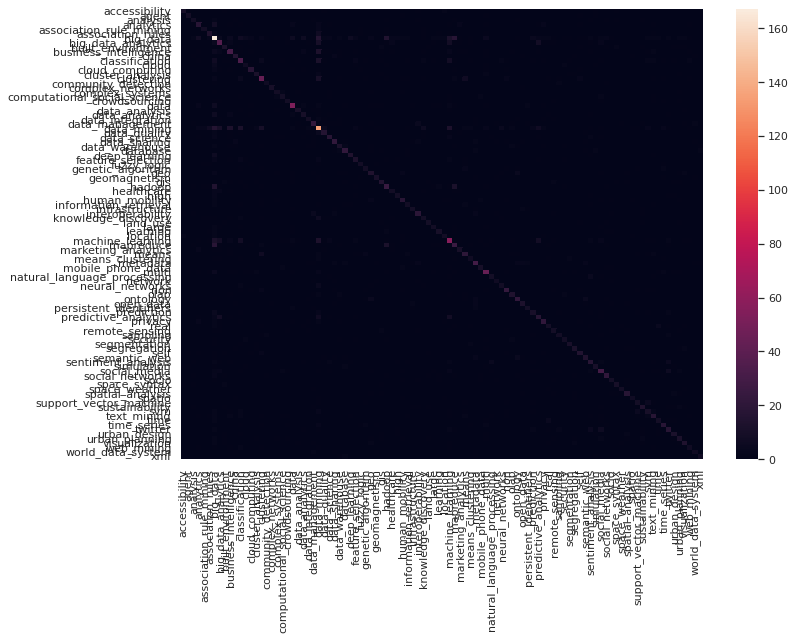

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(cooccurrence_matrix, xticklabels=vectorizer.get_feature_names(), yticklabels=vectorizer.get_feature_names())

# Punto 4 Nube

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
transformer = TfidfTransformer(norm="l2", smooth_idf=False)
idf = pd.DataFrame(transformer.fit_transform(cooccurrence_matrix).toarray(), columns=l)
idf

,accessibility,agent,analysis,analytics,association rule mining,association rules,big data,big data analytics,built environment,business intelligence,china,classification,cloud,cloud computing,cluster analysis,clustering,community detection,complex networks,complex systems,computational social science,crowdsourcing,data,data analysis,data analytics,data integration,data management,data mining,data quality,data science,data sharing,data warehouse,database,deep learning,feature selection,fuzzy logic,genetic algorithm,geo,geomagnetism,gis,hadoop,...,network,neural networks,non,olap,ontology,open data,persistent identifiers,prediction,predictive analytics,privacy,real,remote sensing,sampling,security,segmentation,segregation,self,semantic web,sentiment analysis,simulation,social media,social networks,socio,space syntax,space weather,spatial analysis,spatio,support vector machine,sustainability,svm,text mining,time,time series,twitter,urban design,urban planning,visualization,web mining,world data system,xml
0,0.951961,0.102964,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.084248,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.084248,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.092016,0.000000,0.00000,0.0,0.102964,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.100622,0.979489,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094253,0.0,0.000000,0.097260,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.917358,0.106838,0.000000,0.0,0.115237,0.0,0.000000,0.000000,0.124566,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.102396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.106838,...,0.0,0.0,0.0,0.0,0.117689,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.102396,0.000000,0.000000,0.11467,0.0,0.143833,0.000000,0.000000,0.0,0.0,0.117689,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.054323,0.911035,0.000000,0.0,0.218368,0.0,0.000000,0.041938,0.000000,0.039381,0.0,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.145525,0.000000,0.0,0.0,0.000000,0.102722,0.000000,0.052999,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.059011,0.171924,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.059011,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.046626,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060894,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.970421,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.174525,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.107034,0.0,0.000000,0.000000,0.000000,0.085992,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
fm = svd.fit_transform(idf)
fm

array([[ 0.04230025,  0.14296998],
       [ 0.03134515,  0.07730898],
       [ 0.19141701,  0.30498107],
       [ 0.34507415,  0.00252056],
       [ 0.15219953, -0.10158303],
       [ 0.28912721, -0.11967705],
       [ 0.64967999,  0.1555376 ],
       [ 0.43356427, -0.1421356 ],
       [ 0.08153759,  0.22733697],
       [ 0.47173672, -0.17928011],
       [ 0.05278277,  0.18946244],
       [ 0.54715173, -0.236083  ],
       [ 0.21648539,  0.12068784],
       [ 0.1627153 ,  0.02322935],
       [ 0.11185239,  0.0258196 ],
       [ 0.29188013, -0.14869933],
       [ 0.05425593,  0.04370744],
       [ 0.00182509,  0.03575465],
       [ 0.10577117,  0.13863718],
       [ 0.148785  ,  0.04528827],
       [ 0.17017322,  0.04354483],
       [ 0.1561397 ,  0.11278685],
       [ 0.09589341,  0.03321999],
       [ 0.30928467,  0.05635072],
       [ 0.15747958,  0.05725142],
       [ 0.08815614,  0.33732133],
       [ 0.62059329, -0.3236726 ],
       [ 0.2122877 , -0.04018667],
       [ 0.23791607,

In [ ]:
fm = pd.DataFrame(svd.fit_transform(idf), columns=['x','y'])
fm['words'] = l
fm

,x,y,words
0,0.042300,0.142970,accessibility
1,0.031345,0.077309,agent
2,0.191417,0.304981,analysis
3,0.345074,0.002521,analytics
4,0.152200,-0.101583,association rule mining
...,...,...,...
95,0.173339,0.349362,urban planning
96,0.119586,0.244050,visualization
97,0.256740,-0.129175,web mining
98,0.028512,0.203293,world data system


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(fm, x="x", y="y", text="words", size_max=100, color="words") #log_x=True, 
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Nube', title_x=0.5)
fig.show()

In [ ]:
contador = p.sum()
con = pd.DataFrame(contador, columns=['Contador']).reset_index()
con = con.rename(columns={'index': 'words'})
df_mar = pd.merge(fm, con, on='words')

In [ ]:
fig = px.scatter(df_mar, x="x", y="y", text="words", size_max=100, size='Contador', color="words", hover_name="words", log_x=True) 
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Nube', title_x=0.5)
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
fig = px.scatter(df_mar, x="x", y="y", text="words", size='Contador', color="Contador", log_x = True, size_max = 60, hover_name="words", 
                 color_continuous_scale = px.colors.sequential.Aggrnyl
                 )  
fig.update_traces(textposition='top center')  #, textfont_size=contador
fig.update_layout(title_text='Nube', title_x=0.5)
fig.update_layout(showlegend=False)
fig.show()